In [253]:
#librerias a importar
import pandas as pd
import numpy as np
import re  #
import seaborn as sns
import matplotlib.pyplot as plt

In [254]:
#Se concatenan todos los dataframes --- agregar los demas departamentos
df = pd.read_csv('DatosCompletos.csv',encoding='latin-1')


# Exploración

## Validación de presencia de nulos y manejo de estos

In [255]:
#Listamos los nombres de las columnas
list(df.keys())

#Borramos filas duplicadas
df.drop(columns=["Unnamed: 0"], inplace=True)

df.drop_duplicates(inplace=True)

In [256]:
#Observamos la cantidad de na de cada variable
for e in df.keys():
    print(e, ': ', df[e].isna().sum())

CODIGO :  1
DISTRITO :  232
DEPARTAMENTO :  24
MUNICIPIO :  24
ESTABLECIMIENTO :  24
DIRECCION :  75
TELEFONO :  559
SUPERVISOR :  233
DIRECTOR :  921
NIVEL :  24
SECTOR :  24
AREA :  24
STATUS :  24
MODALIDAD :  24
JORNADA :  24
PLAN :  24
DEPARTAMENTAL :  24


<Axes: >

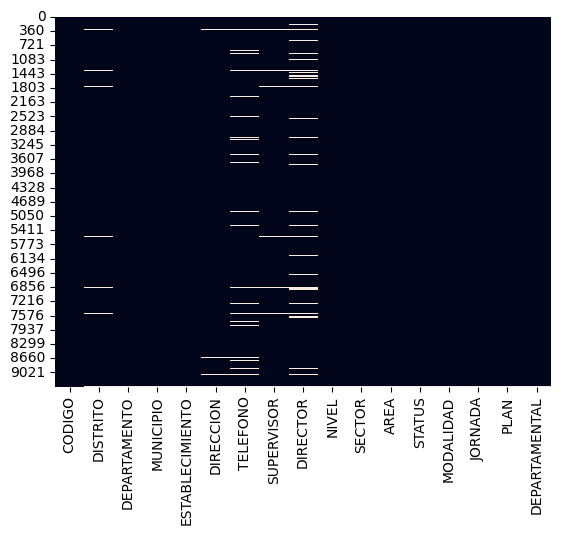

In [257]:
sns.heatmap(df.isnull(), cbar=False)

In [258]:
rows_with_nulls = df.isnull().any(axis=1).sum()

rows_without_nulls = df.shape[0] - rows_with_nulls

print(f"Filas con valores nulos: {rows_with_nulls}")
print(f"Filas sin valores nulos: {rows_without_nulls}")

Filas con valores nulos: 1142
Filas sin valores nulos: 8214


* La presencia de nulos no es muy alta, representando menos del 15% de datos en un banco de datos con más de 9000 entradas.

In [259]:
#Botamos todas las filas con valores nulos en el código o establecimiento ya que estas deberían de ser unicas
df.dropna(subset = ['CODIGO', 'ESTABLECIMIENTO'], inplace=True)
df

,CODIGO,DISTRITO,DEPARTAMENTO,MUNICIPIO,ESTABLECIMIENTO,DIRECCION,TELEFONO,SUPERVISOR,DIRECTOR,NIVEL,SECTOR,AREA,STATUS,MODALIDAD,JORNADA,PLAN,DEPARTAMENTAL
0,21-01-0101-46,21-002,JALAPA,JALAPA,INSTITUTO NORMAL CENTROAMERICANO PARA SEÃORIT...,"AVENIDA CHIPILAPA 1-65, ZONA 2",79224268,JORGE ADELINO PEREZ UCELO,IRIS JANNETTE AGUIRRE CONTRERAS,DIVERSIFICADO,OFICIAL,URBANA,ABIERTA,MONOLINGUE,VESPERTINA,DIARIO(REGULAR),JALAPA
1,21-01-0104-46,21-002,JALAPA,JALAPA,INSTITUTO NORMAL CENTROAMERICANO PARA VARONES,"CALLE TRANSITO ROJAS, 4-82, ZONA 2, BARRIO SAN...",40645842,JORGE ADELINO PEREZ UCELO,LISI KARINA ESCOBAR ESPINOZA,DIVERSIFICADO,OFICIAL,URBANA,ABIERTA,MONOLINGUE,MATUTINA,DIARIO(REGULAR),JALAPA
2,21-01-0106-46,21-004,JALAPA,JALAPA,COLEGIO PARTICULAR MIXTO LICEO JALAPA,CALLE TRANSITO ROJAS 7-60 ZONA 1,79220013,VICTOR MANUEL PORTILLO RECINOS,EFRAÃN DE JESÃS SALAZAR PERALTA,DIVERSIFICADO,PRIVADO,URBANA,ABIERTA,MONOLINGUE,NOCTURNA,DIARIO(REGULAR),JALAPA
3,21-01-0107-46,21-004,JALAPA,JALAPA,INSTITUTO PARTICULAR MIXTO MODERNO JALAPANECO,3A. CALLE 0-39 ZONA 2 BARRIO LA ESPERANZA,51228253,VICTOR MANUEL PORTILLO RECINOS,GERMAN DE JESUS RAMOS VALLE,DIVERSIFICADO,PRIVADO,URBANA,TEMPORAL TITULOS,MONOLINGUE,VESPERTINA,DIARIO(REGULAR),JALAPA
4,21-01-0108-46,21-004,JALAPA,JALAPA,INSTITUTO PRIVADO DE EDUCACION DIVERSIFICADA E...,"4A. AVENIDA 2-66, ZONA 2 BARRIO SAN FRANCISCO",79224958-79223033,VICTOR MANUEL PORTILLO RECINOS,ROSA CORALIA PINEDA GALLARDO,DIVERSIFICADO,PRIVADO,URBANA,ABIERTA,MONOLINGUE,VESPERTINA,DIARIO(REGULAR),JALAPA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9371,12-30-0080-46,12-107,SAN MARCOS,LA BLANCA,"""COLEGIO EDUCATIVO MIXTO LUNA AZUL -CEMLA-""",PARCELAMIENTO CHIQUIRINES,45454204,JUAN JOSE TOBAR TEBALAN,BETY PATRICIA OXLAJ PÃREZ,DIVERSIFICADO,PRIVADO,RURAL,ABIERTA,MONOLINGUE,VESPERTINA,DIARIO(REGULAR),SAN MARCOS
9372,12-30-0082-46,12-093,SAN MARCOS,LA BLANCA,"COLEGIO PRIVADO URBANO MIXTO ""LICEO MODERNO""",CABECERA MUNICIPAL,30296022,JUAN JOSÃ TOBAR TEBALAN,MAVERIK GEYSTYNG HURTADO CIFUENTES,DIVERSIFICADO,PRIVADO,URBANA,ABIERTA,MONOLINGUE,NOCTURNA,DIARIO(REGULAR),SAN MARCOS
9373,12-30-0085-46,12-093,SAN MARCOS,LA BLANCA,COLEGIO ADVENTISTA MARANATHA,CABECERA MUNICIPAL,49582374,JUAN JOSÃ TOBAR TEBALAN,USIELA SARONITA CARRETO LÃPEZ,DIVERSIFICADO,PRIVADO,URBANA,ABIERTA,MONOLINGUE,SIN JORNADA,SEMIPRESENCIAL (UN DÃA A LA SEMANA),SAN MARCOS
9374,12-30-0087-46,12-107,SAN MARCOS,LA BLANCA,COLEGIO EDUCATIVO MIXTO LUNA AZUL -CEMLA-,PARCELAMIENTO CHIQUIRINES,45454204,JUAN JOSE TOBAR TEBALAN,BETY PATRICIA OXLAJ PÃREZ,DIVERSIFICADO,PRIVADO,RURAL,ABIERTA,MONOLINGUE,SIN JORNADA,SEMIPRESENCIAL (UN DÃA A LA SEMANA),SAN MARCOS


<Axes: >

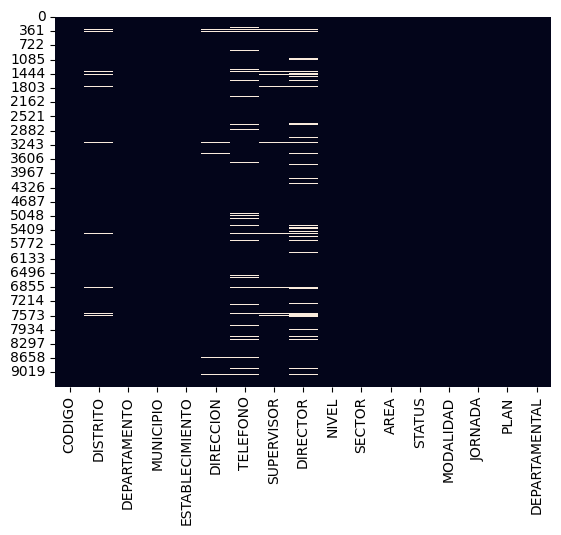

In [260]:
sns.heatmap(df.isnull(), cbar=False)

## Exploración individual de variables

### Frecuencia de datos y normalización de valores

#### Variable Establecimiento

In [261]:
#Contamos las repeticiones de establecimientos
df.ESTABLECIMIENTO.value_counts()

ESTABLECIMIENTO
INSTITUTO NACIONAL DE EDUCACION DIVERSIFICADA                               330
INSTITUTO NACIONAL DE EDUCACIÃN DIVERSIFICADA                               95
CENTRO DE EDUCACIÃN EXTRAESCOLAR -CEEX-                                     34
INSTITUTO DE EDUCACION DIVERSIFICADA POR COOPERATIVA DE ENSEÃANZA           27
INSTITUTO DIVERSIFICADO POR COOPERATIVA                                      23
                                                                           ... 
INSTITUTO COMUNITARIO DE CIENCIAS COMERCIALES "EL ALTIPLANO"                  1
INSTITUTO MIXTO DE EDUCACIÃN DIVERSIFICADA POR COOPERATIVA "MAYA NA OJ"      1
CENTRO EDUCATIVO "SANTIAGO DE LA ASUNCIÃN" FE Y ALEGRÃA NO. 51              1
INSTITUTO MIXTO OXLAJUJ NOJ                                                   1
COLEGIO EDUCATIVO MIXTO LUNA AZUL -CEMLA-                                     1
Name: count, Length: 5321, dtype: int64

* Existen 5321 valores únicos de diferentes establecimientos 

In [262]:
#Removemos acentos
cols = df.select_dtypes(include=[object]).columns
df[cols] = df[cols].apply(lambda x: x.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8'))
df.ESTABLECIMIENTO.value_counts()

ESTABLECIMIENTO
INSTITUTO NACIONAL DE EDUCACION DIVERSIFICADA                               330
INSTITUTO NACIONAL DE EDUCACIAN DIVERSIFICADA                                96
CENTRO DE EDUCACIAN EXTRAESCOLAR -CEEX-                                      34
INSTITUTO DE EDUCACION DIVERSIFICADA POR COOPERATIVA DE ENSEAANZA            27
INSTITUTO DIVERSIFICADO POR COOPERATIVA                                      23
                                                                           ... 
CENTRO EDUCATIVO "SANTIAGO DE LA ASUNCIAN" FE Y ALEGRAA NO. 51                1
INSTITUTO MIXTO OXLAJUJ NOJ                                                   1
INSTITUTO COMUNITARIO DE CIENCIAS COMERCIALES EL ALTIPLANO                    1
ESCUELA NACIONAL DE CIENCIAS COMERCIALES "DR. JUAN JOSA ARAVALO BERMEJO"      1
COLEGIO EDUCATIVO MIXTO LUNA AZUL -CEMLA-                                     1
Name: count, Length: 5288, dtype: int64

#### Estandarización de letras

In [263]:
# Estandarizar texto: convertir a minúsculas y eliminar espacios innecesarios
cols_to_lower = ['DISTRITO', 'DEPARTAMENTO', 'MUNICIPIO', 'ESTABLECIMIENTO', 'SUPERVISOR', 'DIRECTOR', 'DIRECCION']
df[cols_to_lower] = df[cols_to_lower].apply(lambda x: x.str.strip().str.lower().str.replace('\'','').str.replace('"',''))

# Eliminar las fechas en estas columnas
def remove_date_segments(text):
    if isinstance(text, str):  # Asegurarse de que el texto es una cadena
        # Define regex patterns for date-like segments
        date_patterns = [
            r'\b\d{4}[-/]\d{2}[-/]\d{2}\b',  # Matches 'YYYY-MM-DD' or 'YYYY/MM/DD'
            r'\b\d{2}[-/]\d{2}[-/]\d{4}\b',  # Matches 'DD-MM-YYYY' or 'DD/MM/YYYY'
            r'\b\d{2}[-/]\d{2}[-/]\d{2}\b'   # Matches 'DD-MM-YY' or 'DD/MM/YY'
        ]

        # Replace date-like segments with an empty string
        for pattern in date_patterns:
            text = re.sub(pattern, '', text)

        # Remove any extra spaces left by the replacement
        return text.strip()
    return text

df[cols_to_lower] = df[cols_to_lower].apply(remove_date_segments)

In [264]:
df.head()

,CODIGO,DISTRITO,DEPARTAMENTO,MUNICIPIO,ESTABLECIMIENTO,DIRECCION,TELEFONO,SUPERVISOR,DIRECTOR,NIVEL,SECTOR,AREA,STATUS,MODALIDAD,JORNADA,PLAN,DEPARTAMENTAL
0,21-01-0101-46,21-002,jalapa,jalapa,instituto normal centroamericano para seaorita...,"avenida chipilapa 1-65, zona 2",79224268,jorge adelino perez ucelo,iris jannette aguirre contreras,DIVERSIFICADO,OFICIAL,URBANA,ABIERTA,MONOLINGUE,VESPERTINA,DIARIO(REGULAR),JALAPA
1,21-01-0104-46,21-002,jalapa,jalapa,instituto normal centroamericano para varones,"calle transito rojas, 4-82, zona 2, barrio san...",40645842,jorge adelino perez ucelo,lisi karina escobar espinoza,DIVERSIFICADO,OFICIAL,URBANA,ABIERTA,MONOLINGUE,MATUTINA,DIARIO(REGULAR),JALAPA
2,21-01-0106-46,21-004,jalapa,jalapa,colegio particular mixto liceo jalapa,calle transito rojas 7-60 zona 1,79220013,victor manuel portillo recinos,efraan de jesas salazar peralta,DIVERSIFICADO,PRIVADO,URBANA,ABIERTA,MONOLINGUE,NOCTURNA,DIARIO(REGULAR),JALAPA
3,21-01-0107-46,21-004,jalapa,jalapa,instituto particular mixto moderno jalapaneco,3a. calle 0-39 zona 2 barrio la esperanza,51228253,victor manuel portillo recinos,german de jesus ramos valle,DIVERSIFICADO,PRIVADO,URBANA,TEMPORAL TITULOS,MONOLINGUE,VESPERTINA,DIARIO(REGULAR),JALAPA
4,21-01-0108-46,21-004,jalapa,jalapa,instituto privado de educacion diversificada e...,"4a. avenida 2-66, zona 2 barrio san francisco",79224958-79223033,victor manuel portillo recinos,rosa coralia pineda gallardo,DIVERSIFICADO,PRIVADO,URBANA,ABIERTA,MONOLINGUE,VESPERTINA,DIARIO(REGULAR),JALAPA


#### Variable fechas

In [265]:
# Eliminar las fechas en estas columnas
def remove_date_segments(text):
    if isinstance(text, str):  # Asegurarse de que el texto es una cadena
        # Define regex patterns for date-like segments
        date_patterns = [
            r'\b\d{4}[-/]\d{2}[-/]\d{2}\b',  # Matches 'YYYY-MM-DD' or 'YYYY/MM/DD'
            r'\b\d{2}[-/]\d{2}[-/]\d{4}\b',  # Matches 'DD-MM-YYYY' or 'DD/MM/YYYY'
            r'\b\d{2}[-/]\d{2}[-/]\d{2}\b'   # Matches 'DD-MM-YY' or 'DD/MM/YY'
        ]

        # Replace date-like segments with an empty string
        for pattern in date_patterns:
            text = re.sub(pattern, '', text)

        # Remove any extra spaces left by the replacement
        return text.strip()
    return text

df[cols_to_lower] = df[cols_to_lower].apply(remove_date_segments)
df

,CODIGO,DISTRITO,DEPARTAMENTO,MUNICIPIO,ESTABLECIMIENTO,DIRECCION,TELEFONO,SUPERVISOR,DIRECTOR,NIVEL,SECTOR,AREA,STATUS,MODALIDAD,JORNADA,PLAN,DEPARTAMENTAL
0,21-01-0101-46,21-002,jalapa,jalapa,instituto normal centroamericano para seaorita...,"avenida chipilapa 1-65, zona 2",79224268,jorge adelino perez ucelo,iris jannette aguirre contreras,DIVERSIFICADO,OFICIAL,URBANA,ABIERTA,MONOLINGUE,VESPERTINA,DIARIO(REGULAR),JALAPA
1,21-01-0104-46,21-002,jalapa,jalapa,instituto normal centroamericano para varones,"calle transito rojas, 4-82, zona 2, barrio san...",40645842,jorge adelino perez ucelo,lisi karina escobar espinoza,DIVERSIFICADO,OFICIAL,URBANA,ABIERTA,MONOLINGUE,MATUTINA,DIARIO(REGULAR),JALAPA
2,21-01-0106-46,21-004,jalapa,jalapa,colegio particular mixto liceo jalapa,calle transito rojas 7-60 zona 1,79220013,victor manuel portillo recinos,efraan de jesas salazar peralta,DIVERSIFICADO,PRIVADO,URBANA,ABIERTA,MONOLINGUE,NOCTURNA,DIARIO(REGULAR),JALAPA
3,21-01-0107-46,21-004,jalapa,jalapa,instituto particular mixto moderno jalapaneco,3a. calle 0-39 zona 2 barrio la esperanza,51228253,victor manuel portillo recinos,german de jesus ramos valle,DIVERSIFICADO,PRIVADO,URBANA,TEMPORAL TITULOS,MONOLINGUE,VESPERTINA,DIARIO(REGULAR),JALAPA
4,21-01-0108-46,21-004,jalapa,jalapa,instituto privado de educacion diversificada e...,"4a. avenida 2-66, zona 2 barrio san francisco",79224958-79223033,victor manuel portillo recinos,rosa coralia pineda gallardo,DIVERSIFICADO,PRIVADO,URBANA,ABIERTA,MONOLINGUE,VESPERTINA,DIARIO(REGULAR),JALAPA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9371,12-30-0080-46,12-107,san marcos,la blanca,colegio educativo mixto luna azul -cemla-,parcelamiento chiquirines,45454204,juan jose tobar tebalan,bety patricia oxlaj parez,DIVERSIFICADO,PRIVADO,RURAL,ABIERTA,MONOLINGUE,VESPERTINA,DIARIO(REGULAR),SAN MARCOS
9372,12-30-0082-46,12-093,san marcos,la blanca,colegio privado urbano mixto liceo moderno,cabecera municipal,30296022,juan josa tobar tebalan,maverik geystyng hurtado cifuentes,DIVERSIFICADO,PRIVADO,URBANA,ABIERTA,MONOLINGUE,NOCTURNA,DIARIO(REGULAR),SAN MARCOS
9373,12-30-0085-46,12-093,san marcos,la blanca,colegio adventista maranatha,cabecera municipal,49582374,juan josa tobar tebalan,usiela saronita carreto lapez,DIVERSIFICADO,PRIVADO,URBANA,ABIERTA,MONOLINGUE,SIN JORNADA,SEMIPRESENCIAL (UN DAA A LA SEMANA),SAN MARCOS
9374,12-30-0087-46,12-107,san marcos,la blanca,colegio educativo mixto luna azul -cemla-,parcelamiento chiquirines,45454204,juan jose tobar tebalan,bety patricia oxlaj parez,DIVERSIFICADO,PRIVADO,RURAL,ABIERTA,MONOLINGUE,SIN JORNADA,SEMIPRESENCIAL (UN DAA A LA SEMANA),SAN MARCOS


#### Variable Departamento

Ciudad Capital tenian sus datos distribuidos de una manera distinta pues la variables DEPARTAMENTO guarda el municipio del establecimiento y la variable MUNICIPIO guarda la zona de la capital en la que recide, así que se crea una variable para reordenar estos datos y volver a la ciudad capital parte de guatemala

Text(0.5, 1.0, 'Count Plot for DEPARTAMENTO')

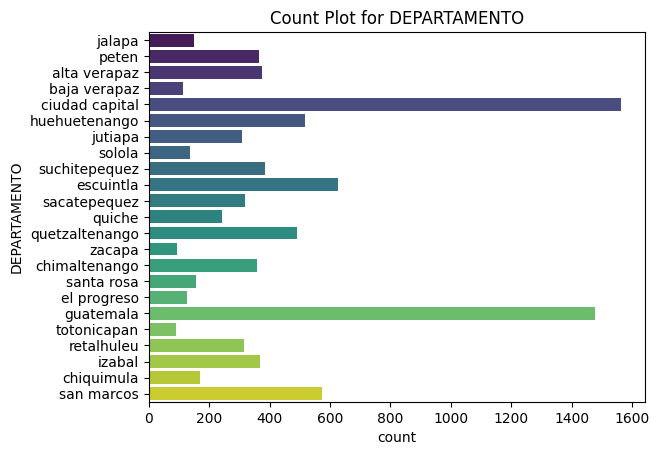

In [266]:
column = "DEPARTAMENTO"
sns.countplot(y=column, data=df, palette='viridis')
plt.title(f'Count Plot for {column}')

Text(0.5, 1.0, 'Count Plot for DEPARTAMENTO')

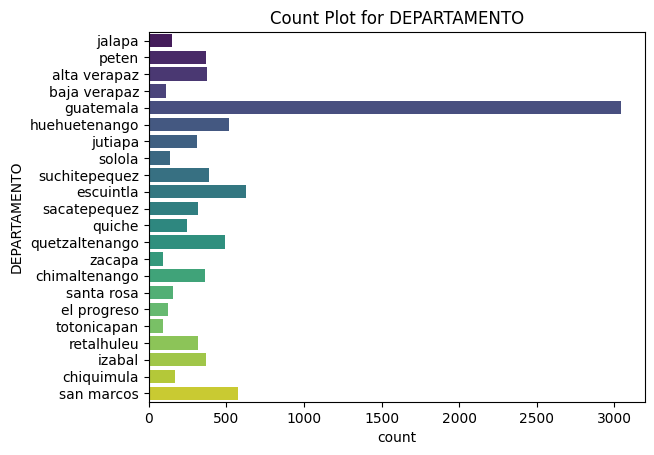

In [267]:
#creamos la variable zona para la ciudad capital
df = df.assign(ZONA = lambda x: np.where(x.DEPARTAMENTO == "ciudad capital", x.MUNICIPIO, None))
#volvemos el departamento un municipio
df = df.assign(MUNICIPIO = lambda x: np.where(x.DEPARTAMENTO == "ciudad capital", x.DEPARTAMENTO, x.MUNICIPIO))
#unimos ciudad capital a guatemala
df = df.assign(DEPARTAMENTO = lambda x: np.where(x.DEPARTAMENTO == "ciudad capital", "guatemala", x.DEPARTAMENTO))

sns.countplot(y=column, data=df, palette='viridis')
plt.title(f'Count Plot for {column}')

#### Variable MUNICIPIO

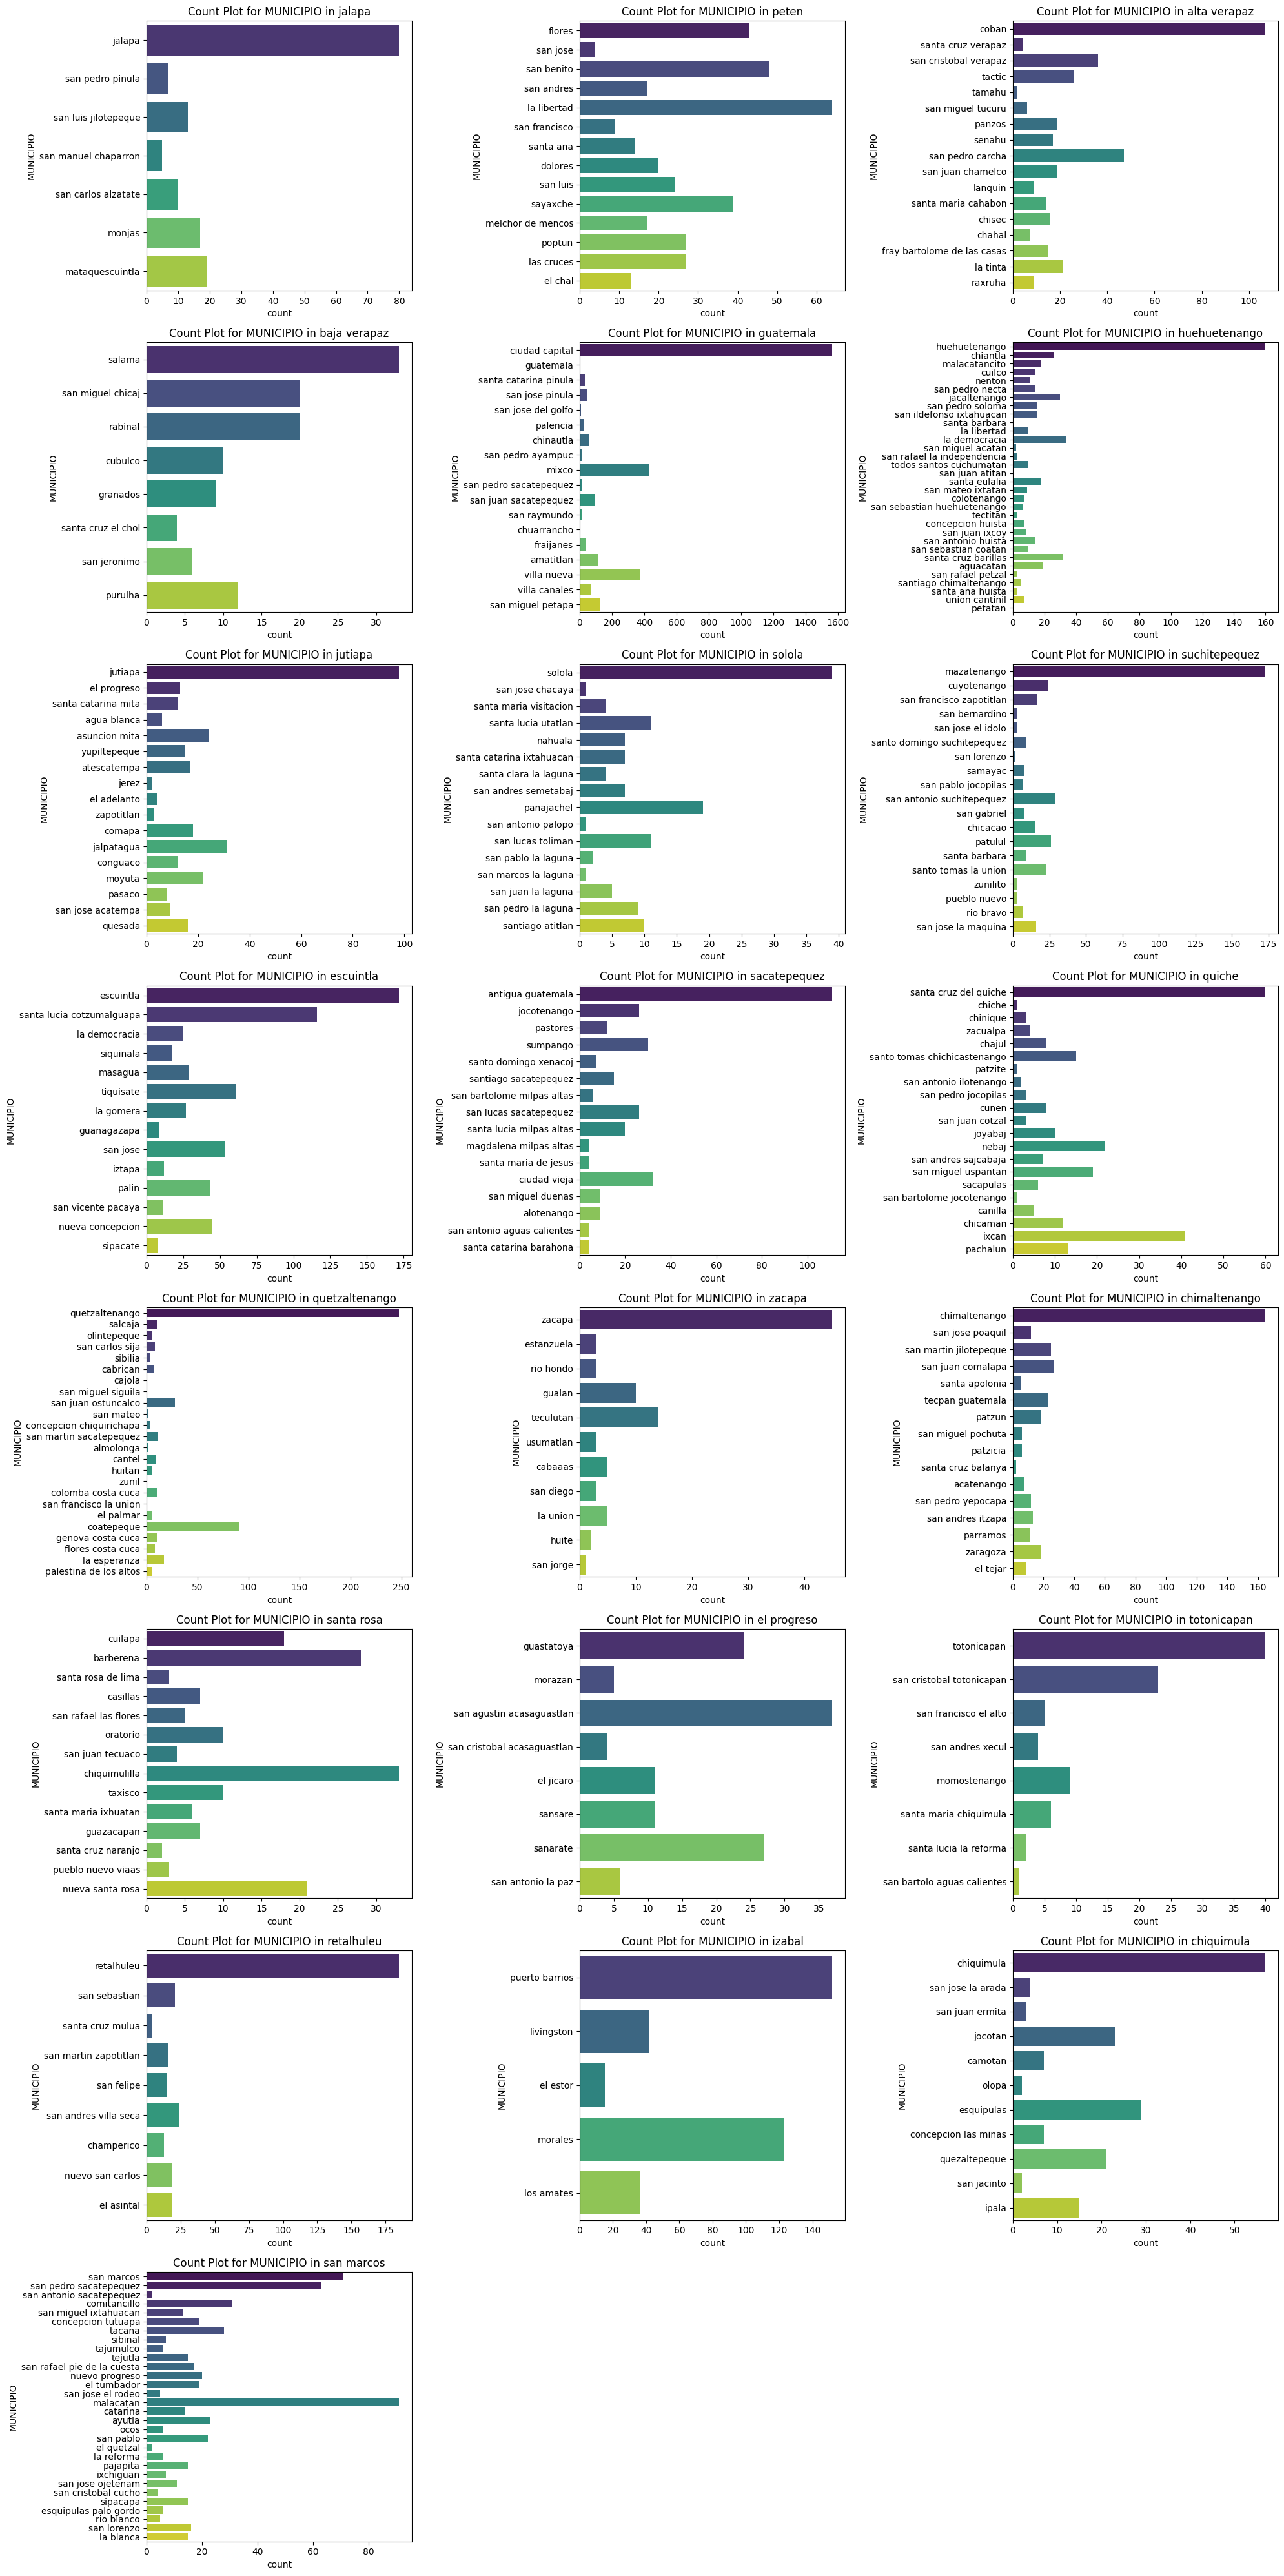

In [268]:
departamentos = df['DEPARTAMENTO'].unique()

# Determine the grid size based on the number of unique DEPARTAMENTOs
n_departamentos = len(departamentos)
cols = 3  # Number of columns in the grid
rows = (n_departamentos // cols) + (n_departamentos % cols > 0)  # Calculate the number of rows

# Set up the figure and axes for the subplots
fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 5))

# Flatten the axes array for easy iteration, if necessary
if n_departamentos > 1:
    axes = axes.flatten()
else:
    axes = [axes]

# Loop through each DEPARTAMENTO and create the count plots
for i, departamento in enumerate(departamentos):
    ax = axes[i]
    sns.countplot(y='MUNICIPIO', data=df[df['DEPARTAMENTO'] == departamento], palette='viridis', ax=ax)
    ax.set_title(f'Count Plot for MUNICIPIO in {departamento}')

# Remove any unused subplots if the number of DEPARTAMENTOs isn't a perfect multiple of the grid columns
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('departamentos_municipios_countplot.png')
plt.show()

#### Variable dirección

Esta variable tiene diferentes tipos de formatos, decidimos validar direcciones claramente erroneas, constituidas por un par decaracteres invalidos, como "-", "--", "---", ".", "". y las definimos como NONE.

In [269]:
direcciones_invalidas = ['-', '--', '---', '.', ' ', '  ']
df['DIRECCION'] = df['DIRECCION'].replace(direcciones_invalidas, np.nan)
df['DIRECCION'] = df['DIRECCION'].str.lower().str.strip()
# Function to check if a string is a date and convert it to NaN
def check_date_and_replace(value):
    try:
        pd.to_datetime(value, errors='raise')
        return np.nan
    except ValueError:
        return value
df['DIRECCION'] = df['DIRECCION'].apply(check_date_and_replace)

C:\Users\diego\AppData\Local\Temp\ipykernel_31612\2813837539.py:7: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  pd.to_datetime(value, errors='raise')


#### Variable Teléfono

In [270]:
# Si una entrada posee 8 caracteres o más, botamos la cola del dato y nos quedamos con los primeros 8 caracteres.
# Si es menor a 8 o posee caracteres es desechado
import re
df['TELEFONO'] = df['TELEFONO'].apply(lambda x: str(x))
# En el caso de que incluya mas de un telefono
def cleanPhoneNumber(number):
  # Split por cualquier caracter que no es numero
  numberChains = re.split(r'\D+', number)
  # Revisar que todos los numeros sean numeros validos, longitud de 8
  validChains = [num for num in numberChains if len(num) == 8]
  # Retornar en caso de que haya al menos uno la lista, en cualquier otro caso retornar None
  return validChains if len(validChains) > 0 else None
df['TELEFONO'] = df['TELEFONO'].apply(cleanPhoneNumber)
df.head()

,CODIGO,DISTRITO,DEPARTAMENTO,MUNICIPIO,ESTABLECIMIENTO,DIRECCION,TELEFONO,SUPERVISOR,DIRECTOR,NIVEL,SECTOR,AREA,STATUS,MODALIDAD,JORNADA,PLAN,DEPARTAMENTAL,ZONA
0,21-01-0101-46,21-002,jalapa,jalapa,instituto normal centroamericano para seaorita...,"avenida chipilapa 1-65, zona 2",[79224268],jorge adelino perez ucelo,iris jannette aguirre contreras,DIVERSIFICADO,OFICIAL,URBANA,ABIERTA,MONOLINGUE,VESPERTINA,DIARIO(REGULAR),JALAPA,None
1,21-01-0104-46,21-002,jalapa,jalapa,instituto normal centroamericano para varones,"calle transito rojas, 4-82, zona 2, barrio san...",[40645842],jorge adelino perez ucelo,lisi karina escobar espinoza,DIVERSIFICADO,OFICIAL,URBANA,ABIERTA,MONOLINGUE,MATUTINA,DIARIO(REGULAR),JALAPA,None
2,21-01-0106-46,21-004,jalapa,jalapa,colegio particular mixto liceo jalapa,calle transito rojas 7-60 zona 1,[79220013],victor manuel portillo recinos,efraan de jesas salazar peralta,DIVERSIFICADO,PRIVADO,URBANA,ABIERTA,MONOLINGUE,NOCTURNA,DIARIO(REGULAR),JALAPA,None
3,21-01-0107-46,21-004,jalapa,jalapa,instituto particular mixto moderno jalapaneco,3a. calle 0-39 zona 2 barrio la esperanza,[51228253],victor manuel portillo recinos,german de jesus ramos valle,DIVERSIFICADO,PRIVADO,URBANA,TEMPORAL TITULOS,MONOLINGUE,VESPERTINA,DIARIO(REGULAR),JALAPA,None
4,21-01-0108-46,21-004,jalapa,jalapa,instituto privado de educacion diversificada e...,"4a. avenida 2-66, zona 2 barrio san francisco","[79224958, 79223033]",victor manuel portillo recinos,rosa coralia pineda gallardo,DIVERSIFICADO,PRIVADO,URBANA,ABIERTA,MONOLINGUE,VESPERTINA,DIARIO(REGULAR),JALAPA,None


#### Variable Director

En algunos establecimientos no aparece quien es el directos y aparecen puntos o caracteres diferentes así que nos cambiamos por NaN

In [271]:
df['DIRECTOR']

0          iris jannette aguirre contreras
1             lisi karina escobar espinoza
2          efraan de jesas salazar peralta
3              german de jesus ramos valle
4             rosa coralia pineda gallardo
                       ...                
9371             bety patricia oxlaj parez
9372    maverik geystyng hurtado cifuentes
9373         usiela saronita carreto lapez
9374             bety patricia oxlaj parez
9375    maverik geystyng hurtado cifuentes
Name: DIRECTOR, Length: 9332, dtype: object

In [272]:
#Contamos las repeticiones de directores
print(df.DIRECTOR.value_counts())
df['DIRECTOR'] = df['DIRECTOR'].apply(lambda x: np.nan if pd.isnull(x) or re.fullmatch(r'-{1,}|\.{1,}|0+|X+|\s*|-+| +|SIN DATO', str(x)) else x)
# Limpiamos a los supervisores
df['SUPERVISOR'] = df['SUPERVISOR'].apply(lambda x: np.nan if pd.isnull(x) or re.fullmatch(r'-{1,}|\.{1,}|0+|X+|\s*|-+| +|SIN DATO', str(x)) else x)

DIRECTOR
---                                  83
----                                 28
--                                   27
sin dato                             14
-----                                14
                                     ..
mariela floribal mandez maldonado     1
leonel arnulfo ortega morataya        1
byron estuardo gonzalez enriquez      1
maraa eugenia barrera barreda         1
felix alexander tarrez rodraguez      1
Name: count, Length: 4655, dtype: int64


In [273]:
# Eliminar duplicados basados en CODIGO y DIRECCION
df = df.drop_duplicates(subset=['CODIGO', 'DIRECCION'], keep='first')


In [274]:
# Verificar nuevamente valores nulos
nulos_despues = df.isnull().sum()
print("Valores nulos después de limpieza:\n", nulos_despues)


Valores nulos después de limpieza:
 CODIGO                0
DISTRITO            208
DEPARTAMENTO          0
MUNICIPIO             0
ESTABLECIMIENTO       0
DIRECCION            65
TELEFONO            613
SUPERVISOR          209
DIRECTOR           1109
NIVEL                 0
SECTOR                0
AREA                  0
STATUS                0
MODALIDAD             0
JORNADA               0
PLAN                  0
DEPARTAMENTAL         0
ZONA               7768
dtype: int64


In [275]:
# Limpiar esta que solo tiene nulos
df = df.drop(columns=['ZONA'])

<Axes: >

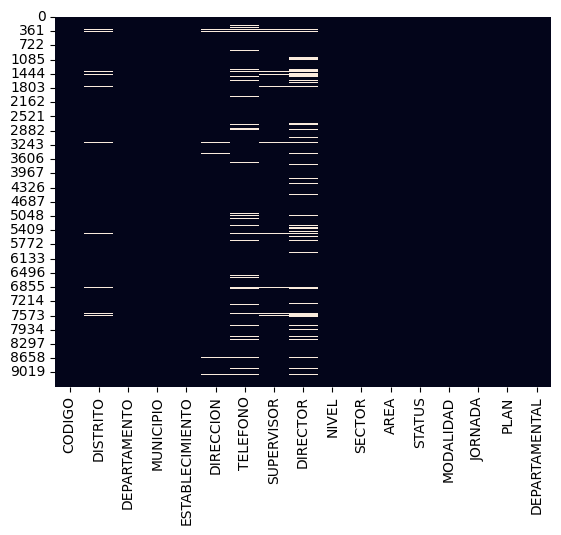

In [276]:
sns.heatmap(df.isnull(), cbar=False)

#### Variable de Dirección

In [277]:
column = "DIRECCION"
sns.countplot(y=column, data=df, palette='viridis')
plt.title(f'Count Plot for {column}')

Text(0.5, 1.0, 'Count Plot for DIRECCION')

In [ ]:
df.head()

,CODIGO,DISTRITO,DEPARTAMENTO,MUNICIPIO,ESTABLECIMIENTO,DIRECCION,TELEFONO,SUPERVISOR,DIRECTOR,NIVEL,SECTOR,AREA,STATUS,MODALIDAD,JORNADA,PLAN,DEPARTAMENTAL
0,21-01-0101-46,21-002,jalapa,jalapa,instituto normal centroamericano para seaorita...,"avenida chipilapa 1-65, zona 2",[79224268],jorge adelino perez ucelo,iris jannette aguirre contreras,DIVERSIFICADO,OFICIAL,URBANA,ABIERTA,MONOLINGUE,VESPERTINA,DIARIO(REGULAR),JALAPA
1,21-01-0104-46,21-002,jalapa,jalapa,instituto normal centroamericano para varones,"calle transito rojas, 4-82, zona 2, barrio san...",[40645842],jorge adelino perez ucelo,lisi karina escobar espinoza,DIVERSIFICADO,OFICIAL,URBANA,ABIERTA,MONOLINGUE,MATUTINA,DIARIO(REGULAR),JALAPA
2,21-01-0106-46,21-004,jalapa,jalapa,colegio particular mixto liceo jalapa,calle transito rojas 7-60 zona 1,[79220013],victor manuel portillo recinos,efraan de jesas salazar peralta,DIVERSIFICADO,PRIVADO,URBANA,ABIERTA,MONOLINGUE,NOCTURNA,DIARIO(REGULAR),JALAPA
3,21-01-0107-46,21-004,jalapa,jalapa,instituto particular mixto moderno jalapaneco,3a. calle 0-39 zona 2 barrio la esperanza,[51228253],victor manuel portillo recinos,german de jesus ramos valle,DIVERSIFICADO,PRIVADO,URBANA,TEMPORAL TITULOS,MONOLINGUE,VESPERTINA,DIARIO(REGULAR),JALAPA
4,21-01-0108-46,21-004,jalapa,jalapa,instituto privado de educacion diversificada e...,"4a. avenida 2-66, zona 2 barrio san francisco","[79224958, 79223033]",victor manuel portillo recinos,rosa coralia pineda gallardo,DIVERSIFICADO,PRIVADO,URBANA,ABIERTA,MONOLINGUE,VESPERTINA,DIARIO(REGULAR),JALAPA


#### Categorías consistentes 

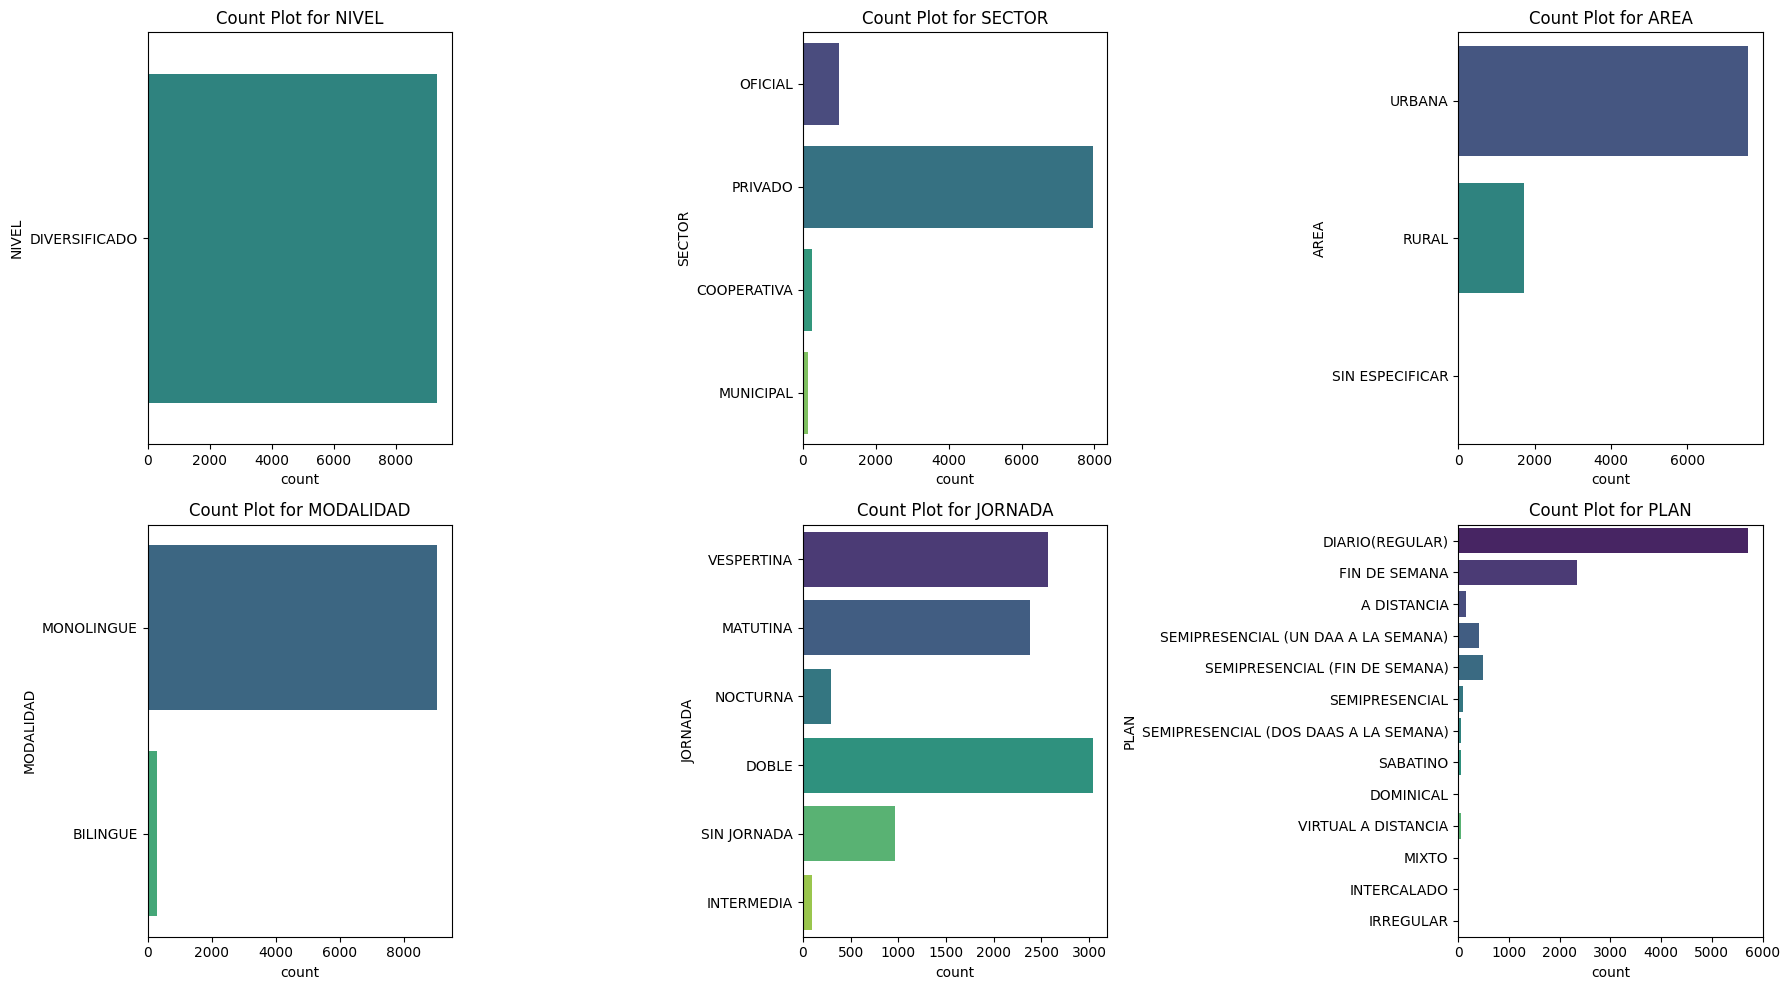

In [ ]:
columns = ['NIVEL', 'SECTOR', 'AREA', 'MODALIDAD','STATUS','JORNADA', 'PLAN']
n_columns = len(columns)
cols = 3  # Number of columns in the grid
rows = (n_columns // cols) + (n_columns % cols > 0)  # Calculate the number of rows

# Set up the figure and axes for the subplots
fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each column and create the count plots
for i, column in enumerate(columns):
    sns.countplot(y=column, data=df, palette='viridis', ax=axes[i])
    axes[i].set_title(f'Count Plot for {column}')

# Remove any unused subplots if the number of columns isn't a perfect multiple of the grid columns
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and display the figure
plt.tight_layout()
plt.show()

#### Encoding de variables categóricas

In [ ]:
from sklearn.preprocessing import LabelEncoder
import json

columns = ['NIVEL', 'SECTOR', 'AREA','STATUS', 'MODALIDAD', 'JORNADA', 'PLAN', 'MUNICIPIO', 'DEPARTAMENTO']
encoding_map = {}

for column in columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    # Convert numpy int32 values to Python int
    encoding_map[column] = {str(k): int(v) for k, v in zip(le.classes_, le.transform(le.classes_))}

In [ ]:
for e in encoding_map:
    print(e, encoding_map[e])

NIVEL {'DIVERSIFICADO': 0}
SECTOR {'COOPERATIVA': 0, 'MUNICIPAL': 1, 'OFICIAL': 2, 'PRIVADO': 3}
AREA {'RURAL': 0, 'SIN ESPECIFICAR': 1, 'URBANA': 2}
MODALIDAD {'BILINGUE': 0, 'MONOLINGUE': 1}
JORNADA {'DOBLE': 0, 'INTERMEDIA': 1, 'MATUTINA': 2, 'NOCTURNA': 3, 'SIN JORNADA': 4, 'VESPERTINA': 5}
PLAN {'A DISTANCIA': 0, 'DIARIO(REGULAR)': 1, 'DOMINICAL': 2, 'FIN DE SEMANA': 3, 'INTERCALADO': 4, 'IRREGULAR': 5, 'MIXTO': 6, 'SABATINO': 7, 'SEMIPRESENCIAL': 8, 'SEMIPRESENCIAL (DOS DAAS A LA SEMANA)': 9, 'SEMIPRESENCIAL (FIN DE SEMANA)': 10, 'SEMIPRESENCIAL (UN DAA A LA SEMANA)': 11, 'VIRTUAL A DISTANCIA': 12}
MUNICIPIO {'acatenango': 0, 'agua blanca': 1, 'aguacatan': 2, 'almolonga': 3, 'alotenango': 4, 'amatitlan': 5, 'antigua guatemala': 6, 'asuncion mita': 7, 'atescatempa': 8, 'ayutla': 9, 'barberena': 10, 'cabaaas': 11, 'cabrican': 12, 'cajola': 13, 'camotan': 14, 'canilla': 15, 'cantel': 16, 'casillas': 17, 'catarina': 18, 'chahal': 19, 'chajul': 20, 'champerico': 21, 'chiantla': 22, 'c

In [ ]:
with open('encoding_map.json', 'w') as json_file:
    json.dump(encoding_map, json_file, ensure_ascii=False, indent=4)

c:\Users\diego\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


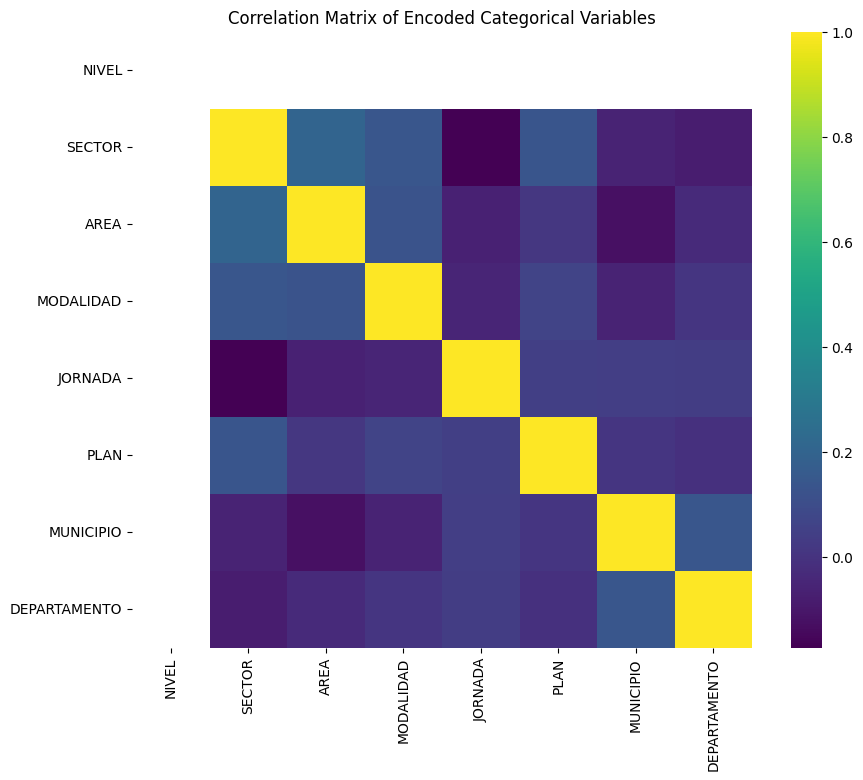

In [ ]:
correlation_matrix = df[columns].corr()

# Display the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Matrix of Encoded Categorical Variables')
plt.show()

In [ ]:
df.head()

,CODIGO,DISTRITO,DEPARTAMENTO,MUNICIPIO,ESTABLECIMIENTO,DIRECCION,TELEFONO,SUPERVISOR,DIRECTOR,NIVEL,SECTOR,AREA,STATUS,MODALIDAD,JORNADA,PLAN,DEPARTAMENTAL
0,21-01-0101-46,21-002,9,85,instituto normal centroamericano para seaorita...,"avenida chipilapa 1-65, zona 2",[79224268],jorge adelino perez ucelo,iris jannette aguirre contreras,0,2,2,ABIERTA,1,5,1,JALAPA
1,21-01-0104-46,21-002,9,85,instituto normal centroamericano para varones,"calle transito rojas, 4-82, zona 2, barrio san...",[40645842],jorge adelino perez ucelo,lisi karina escobar espinoza,0,2,2,ABIERTA,1,2,1,JALAPA
2,21-01-0106-46,21-004,9,85,colegio particular mixto liceo jalapa,calle transito rojas 7-60 zona 1,[79220013],victor manuel portillo recinos,efraan de jesas salazar peralta,0,3,2,ABIERTA,1,3,1,JALAPA
3,21-01-0107-46,21-004,9,85,instituto particular mixto moderno jalapaneco,3a. calle 0-39 zona 2 barrio la esperanza,[51228253],victor manuel portillo recinos,german de jesus ramos valle,0,3,2,TEMPORAL TITULOS,1,5,1,JALAPA
4,21-01-0108-46,21-004,9,85,instituto privado de educacion diversificada e...,"4a. avenida 2-66, zona 2 barrio san francisco","[79224958, 79223033]",victor manuel portillo recinos,rosa coralia pineda gallardo,0,3,2,ABIERTA,1,5,1,JALAPA


## Exportación de datos limpios

In [ ]:
##creamos un csv con los datos limpios
df.to_csv('DatosLimpios.csv')

In [ ]:
df

,CODIGO,DISTRITO,DEPARTAMENTO,MUNICIPIO,ESTABLECIMIENTO,DIRECCION,TELEFONO,SUPERVISOR,DIRECTOR,NIVEL,SECTOR,AREA,STATUS,MODALIDAD,JORNADA,PLAN,DEPARTAMENTAL
0,21-01-0101-46,21-002,9,85,instituto normal centroamericano para seaorita...,"avenida chipilapa 1-65, zona 2",[79224268],jorge adelino perez ucelo,iris jannette aguirre contreras,0,2,2,ABIERTA,1,5,1,JALAPA
1,21-01-0104-46,21-002,9,85,instituto normal centroamericano para varones,"calle transito rojas, 4-82, zona 2, barrio san...",[40645842],jorge adelino perez ucelo,lisi karina escobar espinoza,0,2,2,ABIERTA,1,2,1,JALAPA
2,21-01-0106-46,21-004,9,85,colegio particular mixto liceo jalapa,calle transito rojas 7-60 zona 1,[79220013],victor manuel portillo recinos,efraan de jesas salazar peralta,0,3,2,ABIERTA,1,3,1,JALAPA
3,21-01-0107-46,21-004,9,85,instituto particular mixto moderno jalapaneco,3a. calle 0-39 zona 2 barrio la esperanza,[51228253],victor manuel portillo recinos,german de jesus ramos valle,0,3,2,TEMPORAL TITULOS,1,5,1,JALAPA
4,21-01-0108-46,21-004,9,85,instituto privado de educacion diversificada e...,"4a. avenida 2-66, zona 2 barrio san francisco","[79224958, 79223033]",victor manuel portillo recinos,rosa coralia pineda gallardo,0,3,2,ABIERTA,1,5,1,JALAPA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9371,12-30-0080-46,12-107,16,92,colegio educativo mixto luna azul -cemla-,parcelamiento chiquirines,[45454204],juan jose tobar tebalan,bety patricia oxlaj parez,0,3,0,ABIERTA,1,5,1,SAN MARCOS
9372,12-30-0082-46,12-093,16,92,colegio privado urbano mixto liceo moderno,cabecera municipal,[30296022],juan josa tobar tebalan,maverik geystyng hurtado cifuentes,0,3,2,ABIERTA,1,3,1,SAN MARCOS
9373,12-30-0085-46,12-093,16,92,colegio adventista maranatha,cabecera municipal,[49582374],juan josa tobar tebalan,usiela saronita carreto lapez,0,3,2,ABIERTA,1,4,11,SAN MARCOS
9374,12-30-0087-46,12-107,16,92,colegio educativo mixto luna azul -cemla-,parcelamiento chiquirines,[45454204],juan jose tobar tebalan,bety patricia oxlaj parez,0,3,0,ABIERTA,1,4,11,SAN MARCOS
